<img src=".././photo/condition8.png" alt="photo" width="672" height="400">

0.4606385324397492


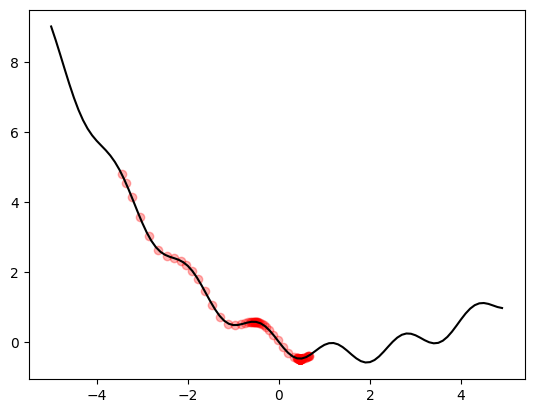

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def func(x):
    return -0.5 * x + 0.2 * x ** 2 - 0.01 * x ** 3 - 0.3 * np.sin(4*x)

def df(x):
    return -0.5 + 0.4 * x - 0.03 * x ** 2 - 0.3 * np.cos(4*x) * 4

nt = 0.1
x = -3.5
N = 200
gm = 0.8
v = 0

x_train = np.arange(-5, 5, 0.1)
y_train = np.array(func(x_train))

plt.plot(x_train, y_train, color='black')

for i in range(N):
    v = gm * v + (1 - gm) * nt * df(x)
    x = x - v

    plt.scatter(x, func(x), c='red', alpha=0.3)


print(x)

# Gradient without impulse

-0.9620770085497927


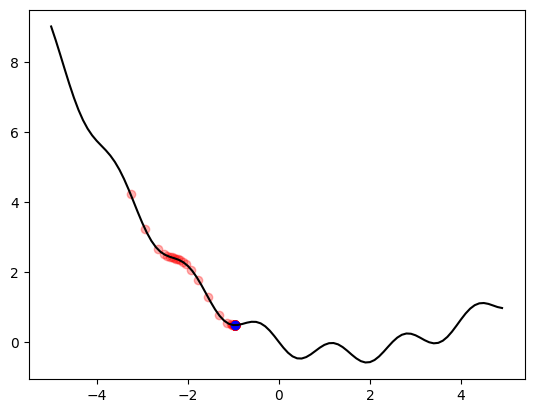

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def func(x):
    return -0.5 * x + 0.2 * x ** 2 - 0.01 * x ** 3 - 0.3 * np.sin(4*x)

def df(x):
    return -0.5 + 0.4 * x - 0.03 * x ** 2 - 0.3 * np.cos(4*x) * 4

nt = 0.1
x = -3.5
N = 200

x_train = np.arange(-5, 5, 0.1)
y_train = np.array(func(x_train))

plt.plot(x_train, y_train, color='black')

for i in range(N):
    x = x - nt * df(x)

    plt.scatter(x, func(x), c='red', alpha=0.3)
    if i == N-1:
        plt.scatter(x, func(x), c='blue')


print(x)

# # <img src=".././photo/condition9.png" alt="photo" width="672" height="400">

0.8117183975270705


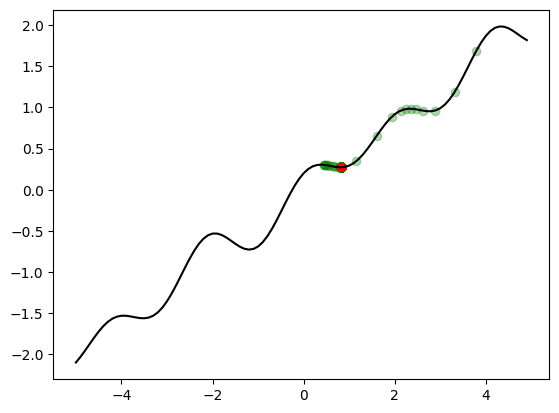

In [29]:
import numpy as np
import matplotlib.pyplot as plt

def func(x):
    return 0.4 * x + 0.1 * np.sin(2*x) + 0.2 * np.cos(3*x)

def df(x):
    return 0.4 + 0.1 * np.cos(2*x) * 2 - 0.2 * np.sin(3*x) * 3

nt = 1
x = 4
N = 500
gm = 0.7
v = 0
x_train = np.arange(-5, 5, 0.1)
y_train = np.array(func(x_train))
plt.plot(x_train, y_train, c='k')

for _ in range(N):
    v = gm * v + (1 - gm) * nt * df(x - gm * v) # The Nesterov's impulse method
    x -= v
    plt.scatter(x, func(x), c='g', alpha=0.3)
    if _ == N-1:
        plt.scatter(x, func(x), c='red')

print(x)

# # <img src=".././photo/condition10.png" alt="photo" width="672" height="400">

0.6193324724910274


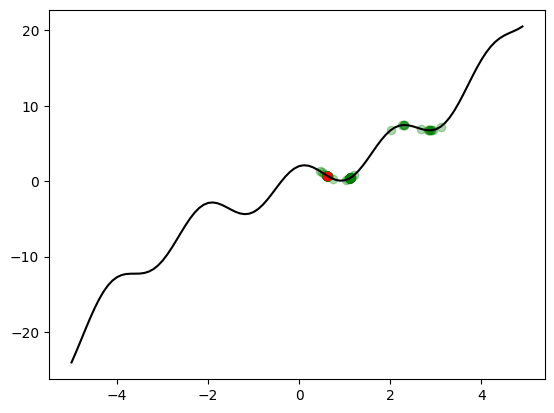

In [33]:
import numpy as np
import matplotlib.pyplot as plt

def func(x):
    return 2 * x + 0.1 * x ** 3 + 2 * np.cos(3*x)

def df(x):
    return 2 + 0.1 * 3 * x ** 2 - 2 * np.sin(3*x) * 3

nt = 0.5
x = 4
N = 200
a = 0.8
G = 0
e = 0.01

x_train = np.arange(-5, 5, 0.1)
y_train = np.array(func(x_train))
plt.plot(x_train, y_train, c='k')
for _ in range(N):
    G = a * G + (1 - a) * df(x) * df(x)
    x -= nt * df(x) / (np.sqrt(G) + e)

    plt.scatter(x, func(x), c='g', alpha=0.3)
    if _ == N-1:
        plt.scatter(x, func(x), c='red')

print(x)

# <img src=".././photo/condition11.png" alt="photo" width="672" height="400">
# <img src=".././photo/condition12.png" alt="photo" width="672" height="400">

Для настоящего поэлементного умножения нужны numpy.array 

np.array(a) * np.array(b) = [a1 * b1, a2 * b2...]

[ 2.00087266 -0.69417019 -0.1972715   0.04912324]
0.02158977628558284
0.02023818813679438


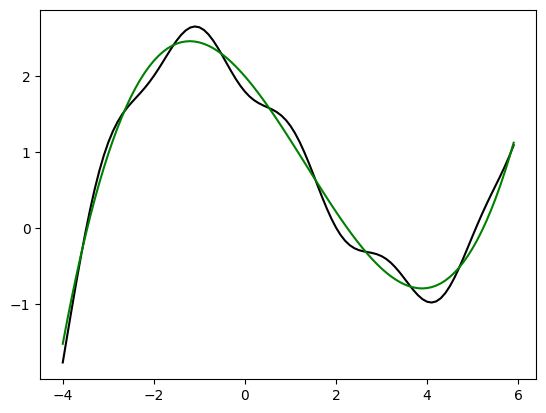

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# исходная функция, которую нужно аппроксимировать моделью a(x)
def func(x):
    return -0.7 * x - 0.2 * x ** 2 + 0.05 * x ** 3 - 0.2 * np.cos(3 * x) + 2


def df(x):
    return -0.7 - 0.2 * 2 * x + 0.05 * 3 * x ** 2 + 0.2 * np.sin(3 * x) * 3


coord_x = np.arange(-4.0, 6.0, 0.1) # значения по оси абсцисс [-4; 6] с шагом 0.1
coord_y = func(coord_x) # значения функции по оси ординат

x_train = [[1, x, x**2, x**3] for x in coord_x]

sz = len(coord_x)	# количество значений функций (точек)
eta = np.array([0.1, 0.01, 0.001, 0.0001]) # шаг обучения для каждого параметра w0, w1, w2, w3
w = np.array([0., 0., 0., 0.]) # начальные значения параметров модели
N = 500 # число итераций алгоритма SGD
lm = 0.02 # значение параметра лямбда для вычисления скользящего экспоненциального среднего
batch_size = 20 # размер мини-батча (величина K = 20)
gamma = 0.8 # коэффициент гамма для вычисления импульсов Нестерова
v = np.zeros(len(w))  # начальное значение [0, 0, 0, 0]

Qe = np.mean([(np.dot(w, x) - y) ** 2 for x, y in zip(x_train, coord_y)]) # начальное значение среднего эмпирического риска
np.random.seed(0) # генерация одинаковых последовательностей псевдослучайных чисел

for _ in range(N):
    k = np.random.randint(0, sz - batch_size - 1)

    Qk = 0
    diff_Qk = []
    for i in range(k, k+batch_size):
        Qk += (np.dot(w, x_train[i]) - coord_y[i]) ** 2
        diff_Qk.append((np.dot((w - gamma * v), x_train[i]) - coord_y[i]) * np.array(x_train[i]))

    Qk /= batch_size
    diff_Qk = 2 * np.mean(diff_Qk, axis=0)

    v = gamma * v + (1 - gamma) * eta * diff_Qk # eta * diff_Qk: element-wise multiplication 
    w = w - v

    Qe = lm * Qk + (1 - lm) * Qe

Q = np.mean([(np.dot(w, x) - y) ** 2 for x, y in zip(x_train, coord_y)])
print(w)
print(Qe)
print(Q)
    
plt.plot(coord_x, coord_y, c='k')
plt.plot(coord_x, [np.dot(w, x) for x in x_train], c='g')


# в Qe используем метрику, которая использовалась в Qk

# <img src=".././photo/condition13.png" alt="photo" width="700" height="450">
# <img src=".././photo/condition14.png" alt="photo" width="672" height="300">

In [17]:
import numpy as np

# логарифмическая функция потерь
def loss(w, x, y):
    M = np.dot(w, x) * y
    return np.log2(1 + np.exp(-M))


# производная логарифмической функции потерь по вектору w
def df(w, x, y):
    M = np.dot(w, x) * y
    return -(np.exp(-M) * x.T * y) / ((1 + np.exp(-M)) * np.log(2))


data_x = [(5.3, 2.3), (5.7, 2.5), (4.0, 1.0), (5.6, 2.4), (4.5, 1.5), (5.4, 2.3), (4.8, 1.8), (4.5, 1.5), (5.1, 1.5), (6.1, 2.3), (5.1, 1.9), (4.0, 1.2), (5.2, 2.0), (3.9, 1.4), (4.2, 1.2), (4.7, 1.5), (4.8, 1.8), (3.6, 1.3), (4.6, 1.4), (4.5, 1.7), (3.0, 1.1), (4.3, 1.3), (4.5, 1.3), (5.5, 2.1), (3.5, 1.0), (5.6, 2.2), (4.2, 1.5), (5.8, 1.8), (5.5, 1.8), (5.7, 2.3), (6.4, 2.0), (5.0, 1.7), (6.7, 2.0), (4.0, 1.3), (4.4, 1.4), (4.5, 1.5), (5.6, 2.4), (5.8, 1.6), (4.6, 1.3), (4.1, 1.3), (5.1, 2.3), (5.2, 2.3), (5.6, 1.4), (5.1, 1.8), (4.9, 1.5), (6.7, 2.2), (4.4, 1.3), (3.9, 1.1), (6.3, 1.8), (6.0, 1.8), (4.5, 1.6), (6.6, 2.1), (4.1, 1.3), (4.5, 1.5), (6.1, 2.5), (4.1, 1.0), (4.4, 1.2), (5.4, 2.1), (5.0, 1.5), (5.0, 2.0), (4.9, 1.5), (5.9, 2.1), (4.3, 1.3), (4.0, 1.3), (4.9, 2.0), (4.9, 1.8), (4.0, 1.3), (5.5, 1.8), (3.7, 1.0), (6.9, 2.3), (5.7, 2.1), (5.3, 1.9), (4.4, 1.4), (5.6, 1.8), (3.3, 1.0), (4.8, 1.8), (6.0, 2.5), (5.9, 2.3), (4.9, 1.8), (3.3, 1.0), (3.9, 1.2), (5.6, 2.1), (5.8, 2.2), (3.8, 1.1), (3.5, 1.0), (4.5, 1.5), (5.1, 1.9), (4.7, 1.4), (5.1, 1.6), (5.1, 2.0), (4.8, 1.4), (5.0, 1.9), (5.1, 2.4), (4.6, 1.5), (6.1, 1.9), (4.7, 1.6), (4.7, 1.4), (4.7, 1.2), (4.2, 1.3), (4.2, 1.3)]
data_y = [1, 1, -1, 1, -1, 1, 1, -1, 1, 1, 1, -1, 1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, 1, -1, 1, -1, 1, 1, 1, 1, -1, 1, -1, -1, -1, 1, 1, -1, -1, 1, 1, 1, 1, -1, 1, -1, -1, 1, 1, -1, 1, -1, -1, 1, -1, -1, 1, 1, 1, -1, 1, -1, -1, 1, 1, -1, 1, -1, 1, 1, 1, -1, 1, -1, 1, 1, 1, 1, -1, -1, 1, 1, -1, -1, -1, 1, -1, -1, 1, -1, 1, 1, -1, 1, -1, -1, -1, -1, -1]

x_train = np.array([[1, x[0], x[1]] for x in data_x])
y_train = np.array(data_y)

n_train = len(x_train)  # размер обучающей выборки
w = [0.0, 0.0, 0.0]  # начальные весовые коэффициенты
nt = np.array([0.1, 0.05, 0.05])  # шаг обучения для каждого параметра w0, w1, w2
lm = 0.01  # значение параметра лямбда для вычисления скользящего экспоненциального среднего
N = 200  # число итераций алгоритма SGD
batch_size = 10 # размер мини-батча (величина K = 10)

alpha = 0.7 # параметр для RMSProp
G = np.zeros(len(w))  # параметр для RMSProp
eps = 0.01 # параметр для RMSProp

Qe = np.mean([loss(w, x, y) for x, y in zip(x_train, y_train)]) # начальное значение среднего эмпирического риска
np.random.seed(0) # генерация одинаковых последовательностей псевдослучайных чисел

for _ in range(N):
    k = np.random.randint(0, n_train - batch_size - 1)
    Qk = 0
    diff_Qk = []
    for i in range(k, k + batch_size):
        Qk += loss(w, x_train[i], y_train[i])
        diff_Qk.append(df(w, x_train[i], y_train[i]))
    Qk /= batch_size
    diff_Qk = np.mean(diff_Qk, axis=0)

    G = alpha * G + (1 - alpha) * diff_Qk * diff_Qk
    w -= nt * (diff_Qk / (np.sqrt(G) + eps))

    Qe = lm * Qk + (1 - lm) * Qe

Q = np.mean([((np.dot(w, x) * y) < 0) for x, y in zip(x_train, y_train)])

print(w)
print(Qe)
print(Q)

[-4.95162202  0.38310615  1.81559159]
0.7174181377501041
0.06
